In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Пусть $N(t)$ – запас этого вида в момент времени $t \geq t_0$. Тогда производная N^' (t) есть темп прироста, а отношение ... представляет собой относительный темп прироста данного биологического вида.

**Случай 1. Относительный темп прироста равен постоянной величине**
Тогда математическая модель изменения численности популяции описывается дифференциальным уравнением
Решением этого уравнения является функция $N = Ce^{rt}$, где C - произвольная постоянная величина. Начальное условие: при $ t = t_0 $

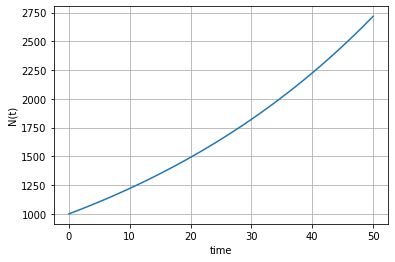

In [ ]:
def model(N, t):
  r = 0.02
  dNdt = r * N
  return dNdt

N0 = 1000

t = np.linspace(0, 50)

N = odeint(model, N0, t)

plt.plot(t,N)
plt.xlabel('time')
plt.ylabel('N(t)')
plt.grid()
plt.show()

**Случай 2. Относительный темп прироста уменьшается линейно c увеличением численности.**
Темп прироста описывается уравнением $dN/dt=r-bN(t)$

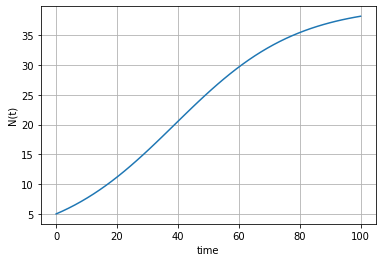

In [ ]:
def model2(N, t):
  r = 0.05
  b = 0.00125
  dNdt = N*(r - b*N)
  return dNdt

N0 = 5

t = np.linspace(0, 100)

N = odeint(model2, N0, t)

plt.plot(t,N)
plt.xlabel('time')
plt.ylabel('N(t)')
plt.grid()
plt.show()

**Случай 3. На относительный темп прироста влияет наличие ресурса.** Влияние ограничивающего ресурса описывается системой уравнений:\
1) $N'(t)=rN(t)(1-N(t)/kF(t))$ \
2) $F'(t)=C-bN(t)$
Для нахождения приближенного численного решения можно применить метод Эйлера.

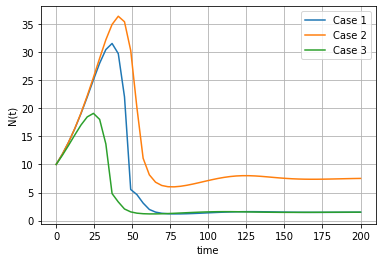

In [ ]:
N0 = 10
F0 = 2
t = np.linspace(0, 200)

def odeEuler2(F0,N0,t, C, r, k, b):
    N = np.zeros(len(t))
    N[0] = N0
    F = np.zeros(len(t))
    F[0] = F0
    for n in range(0,len(t)-1):
        N[n+1] = N[n] + r*N[n]*(1 - N[n]/(k*F[n]))*(t[n+1] - t[n])
        F[n+1] = F[n] + (t[n+1] - t[n])*(C - b*N[n+1])
    return N, F

C = 0.003
r = 0.05
k = 50
b = 0.002
N1, F1 = odeEuler2(F0, N0, t, C, r, k, b)

C = 0.015
N2, F2 = odeEuler2(F0, N0, t, C, r, k, b)

C = 0.003
F0 = 1
N3, F3 = odeEuler2(F0, N0, t, C, r, k, b)

line1, = plt.plot(t,N1)
line2, = plt.plot(t,N2)
line3, = plt.plot(t,N3)
plt.xlabel('time')
plt.ylabel('N(t)')
plt.grid()
plt.legend((line1, line2, line3), ('Case 1', 'Case 2', 'Case 3'))
plt.show()

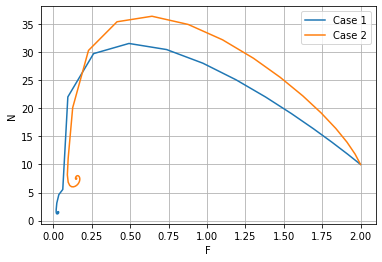

In [ ]:
line1, = plt.plot(F1, N1)
line2, = plt.plot(F2, N2)
plt.xlabel('F')
plt.ylabel('N')
plt.grid()
plt.legend((line1, line2), ('Case 1', 'Case 2'))
plt.show()